X.shape :  (26, 2)


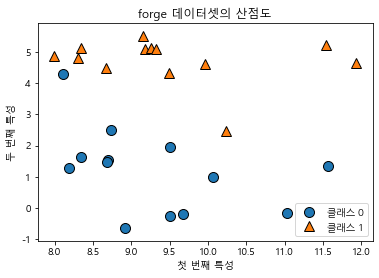

In [1]:
# 지도 학습 알고리즘

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
# 이 책에서의 기본 설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 2진 분류 데이터 셋인 forge 데이터셋을 인위적으로 만듦
X, y = mglearn.datasets.make_forge()
# 산점도를 그림
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.rcParams['font.family'] = 'NanumGothic'  # 한글 깨짐을 방지하기 위한 글씨체를 맑은 나눔으로 설정
plt.legend(["클래스 0", "클래스 1"])
plt.title("forge 데이터셋의 산점도")
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape : ", X.shape)  # 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가짐

# 오류 메시지는 일단 무시하고 진행함.

Text(0, 0.5, '타깃')

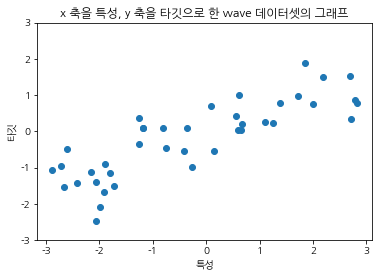

In [2]:
# 회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용함.
# wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수를 가짐.
# 특성을 x축에 회귀의 타킷을 y축에 둠

X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.title("x 축을 특성, y 축을 타깃으로 한 wave 데이터셋의 그래프")
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [3]:
# scikit-learn의 실제 데이터 셋 두개를 불러옴.
# 하나는 유방암 종양의 임상 데이터를 기록해놓은 데이터 셋.
# 각 종양은 양성(해롭지 않음)과 악성(암)으로 레이블 되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제임.
# 데이터는 scikit_learn의 load_breast_cancer함수로 불러올수 있음.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : \n", cancer.keys())

# scikit_learn에 포함된 데이터는 실제 데이터와 데이터셋 정보를 담고 잇는 bunch객체에 저장되어 있음.
# Bunch 객체는 파이썬 딕셔너리와 비슷하지만 점 표기법 사용 가능

cancer.keys() : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# 이 데이터셋은 569개의 데이터 포인트를 가지며 특성은 30개임.
print("유방암 데이터의 형태 : ", cancer.data.shape)

유방암 데이터의 형태 :  (569, 30)


In [5]:
# 569개의 데이터 포인트 중 212개는 악성이고 357개는 양성임.
print("클래스별 샘플 개수 : \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [6]:
# feature_names 속성을 확인하면 각 특성의 의미 파악 가능

print("특성 이름 : \n", cancer.feature_names)

특성 이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# 회귀 분석용 실제 데이터셋은 보스턴 주택가격 데이터셋을 사용.
# 이 데이터셋으로 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보로 1970년대 보스턴 주변의 주택 평균 가격을 예측할 것.
# 이 데이터 셋은 데이터 포인트 506개와 특성 13개가 있음.

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : ", boston.data.shape)

# 이 데이터셋에서는 13개의 입력 특성 분 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장함.
# 즉, 범죄율과 고속도로 접근성의 개별 특성, 그리고 범죄율과 고속도로 접근성의 곱도 특성으로 생각함.
# 이처럼 특성을 유도해내는 것을 __특성 공학__ 이라함.
# 유도된 데이터셋은 load_extended_boston 함수를 사용하여 불러들일 수 있다.

데이터의 형태 :  (506, 13)


In [8]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : ", X.shape)

X.shape :  (506, 104)


In [9]:
# 원래의 13개에서 2개씩 짝찌은 91개의 특성을 더해 총 104개가 됨.

In [10]:
# k-최근접 이웃(k-NN) : nearest Neighbors
# 가장 간단한 알고리즘으로 데이터 셋을 저장하는 것이 모델 만드는 과정의 전부이다.
# 새 데이터 포인트를 예측할 댄 알고리즘이 훈련 데이터에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾는다.


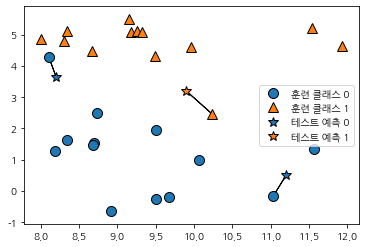

In [11]:
# k-최근접 이웃 분류
mglearn.plots.plot_knn_classification(n_neighbors = 1)

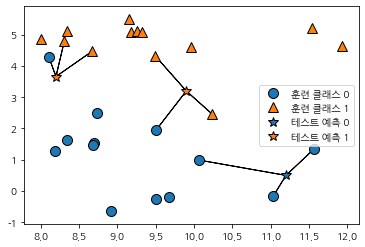

In [12]:
# 데이터 포인트 3개 추가, 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결함.
# 이웃을 임의의 k개 선택 가능.
# 둘 이상의 이웃을 선택시에는 투표를 한다.

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
# scikit-learn으로 k-최근접 이웃 알고리즘의 적용 예를 보자.

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)  # 매개변수로 이웃의 수 지정(3으로)

In [15]:
clf.fit(X_train, y_train)  # 분류 모델 학습(KNeighborsClassifier의 학습은 예측 시 이웃을 찾을 수 있게 데이터 저장하는 것)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("테스트 세트 예측 : ", clf.predict(X_test))  #predict 함수 : 데이터 예측

테스트 세트 예측 :  [1 0 1 0 1 0 0]


In [17]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test))) # 모델의 일반화를 평가하기 위해 score 메서드의 테스트 데이터와
# 레이블을 넣어 호출한다

테스트 세트 정확도 : 0.86


In [18]:
# 이 모델의 정확도는 86%로 나온다.

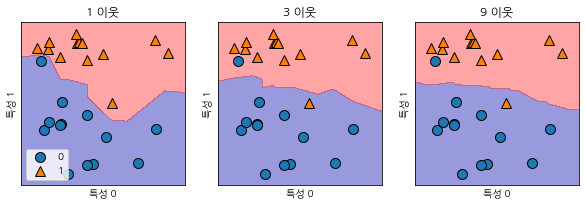

In [19]:
# KNeighborsClassifier 분석

flg, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes) :
    # fit 메소드는 self 오브젝트를 리턴해서 객체 생성과 fit 메소드를 한줄 에 쓸수 있다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    axes[0].legend(loc=3)

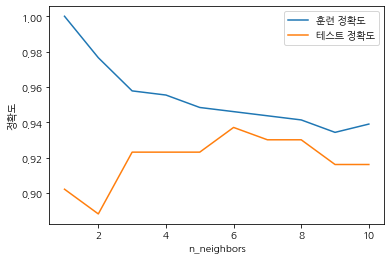

In [20]:
# 이웃의 수가 많아질 수록 경게는 부드러워진다(모델이 단순해짐)
# 즉, 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다.

# 모델의 복잡도와 일반화 사이의 관계 입증을 알아보자.(유방암 데이터셋 사용)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# 먼저 훈련 세트와 테스트 세트로 나눔
# 그후 이웃의 수를 달리 하여 훈련 세트와 테스트 세트의 성능을 평가한디. 
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings :
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [21]:
# 위의 그래프는 이웃 수에 따른 룬련세트와 테스트 세트 정확도를 보여준다.
# 이웃의 수가 적으면 훈련데이터의 예측은 완벽하지만 테스트 정확도가 낮아진단.
# 이웃의 수가 너무 많아도 모델이 너무 단순해져 훈련 데이터의 정확도가 낮아진다.
# 가장 좋은 수는 중간 정도인 6명 이다.

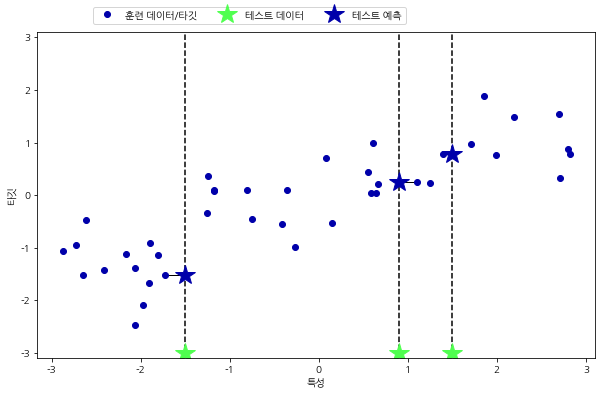

In [22]:
# k-최근접 이웃 회귀

# k-최근접 이웃 알고리즘은 회귀 분석에도 쓰인다.(wave를 사용해 이웃이 하나인 k-최근접 이웃 회귀 구현)
# x축 세개의 테스트 데이터를 흐린 별 모양으로 표시함. 
# 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃값임
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [23]:
# scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어 있다.

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print("테스트 세트 예측 : \n", reg.predict(X_test))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
# score로 모델 평가. 이 메서드는 회귀일 땐 R2 값을 반환함. 결정 계수라고도 하는 R2 같은 회귀 모델에서 예측의 적합도를 측정한 것으로
# 보통 0과 1 사이의 값이 된다. 1(완벽한 예측), 0(훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델)
# R은 음수가 될 수도 있으며, 이때는 예측과 타깃이 상반된 경향을 가짐

print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))  # 0.83이라 비교적 잘 들어맞음

테스트 세트 R^2 : 0.83


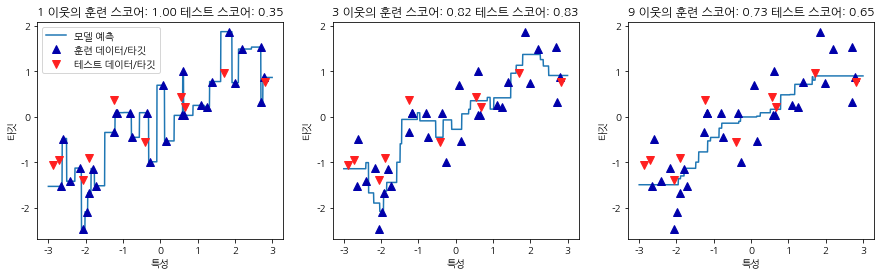

In [27]:
# KNeighborsregressor 분석

# 이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측 가능. 이를 위해 x축을 따라 많은 포인트를 생성해 데이터셋을 만듦.
flg, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1000개의 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes) :
    # 1, 3, 9 이웃을 사용한 예측을 한다.
    reg = KNeighborsRegressor(n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title ("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

In [28]:
# 이웃이 하나면 각 데이터가 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나감.
# 이웃을 많이 사용하면 훈련 데이터에는 잘 안맞지만 더 안정된 예측얼 얻게 된다.

# 일반적으로 KNeighbors(k-최근접 이웃 알고리즘) 분류기에 중요한 매개변수는 2개이다.
# 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수이다.

w[0]: 0.393906  b: -0.031804


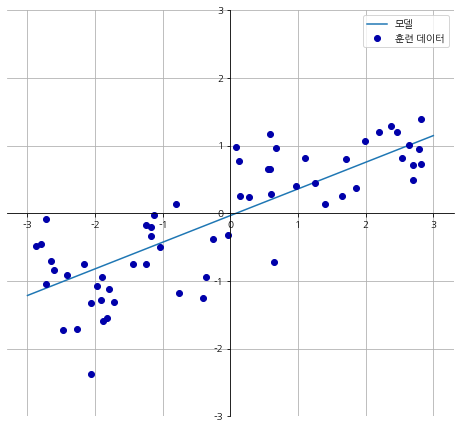

In [29]:
# 선형 모델 : 입력 특성에 대한 선형 함수를 만들어 예측 수행
# 회귀의 경우 선형 모델을 위한 일반화된 예측 함수 : y = w[0] * x[0] + w[1] * x[1] + b
# x : 하나의 데이터 포인트에 대한 특성
# w, b : 모델이 학습할 파라미터
# y : 모델이 만들어낸 예측값

# 1차원 wave 데이터셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시킴.
mglearn.plots.plot_linear_regression_wave()

In [31]:
# 선형 회귀(최소제곱법) : 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w,b를 찾는다.
# 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한후 샘플의 개수로 나눈것.(선혀회귀는 매개변수가 없는것이 장점, 단 모델 복잡도를 제어할 방법도 없음.)

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [32]:
# 기울기 파리미터(w)는 가중치(계수)라 불리며 lr객체의 coef_ 속성에 저장되어 있고
# 편항(절편-b)는 intercept_속성에 저장됨.

print("lr.coef_:",lr.intercept_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: -0.031804343026759746
lr.intercept_: -0.031804343026759746


In [33]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [35]:
# 훈련 세트와 테스트 세트가 비슷하여 과소 적합 상태임을 알수 있다.
# LinearRegression(선형 회귀) 모델이 복잡한 데이터에서 어떻게 동작하는지 보자

X, y = mglearn.datasets.load_extended_boston()
# 데이터 셋에 샘플이 506개, 특성은 총 104개이다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [37]:
# 훈련 데이터와 테스트 데이터의 성능 차이는 모델의 과대적합 때문이다.
# 복잡도를 제어할 수 있는 모델을 사용해야 한다

In [38]:
# 리지 회귀 : 선형 모델로 최소적합법에서 사용한 것과 같은 예측 함수를 사용함.
# 하지만 리지 회귀의 가중치 선택은 추가 제약 조건 만족을 위한 목적도 있음.
# 가중치의 절댓값을 가능한 작게 만드는 것. 즉, w의 모든 원소가 0에 가깝게 되길 원한다.
# 모든 특성이 출력에 주는 영향을 최소한으로 만드며(기울기도 작아짐) 이렇게 과대적합 되지 않게 모델을 강제로 제한하는 것을 규제라고 함.

# 리지 회귀가 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살펴봄
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [42]:
# Ridge 모델은 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정가능.(지정하지 않으면 alpha==1)
# alpha 값을 높이면 계수를 0에 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움 줄수 도 있다.(아래의 예시)

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [44]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
